# Modelos continuos en Kwant

## Modelo BHZ: breves apuntes de teoría

El modelo BHZ es uno de los más simples y completos para describir los aislantes topológicos 2D. Fue propuesto por Bernevig, Hughes y Zhang en 2006 para describir los pozos de HgTe [arXiv](https://arxiv.org/abs/cond-mat/0611399).

El Hamiltoniano del modelo, expresado en una aproximación continua a baja energía es:

\begin{equation}
H_{BHZ} =
\begin{pmatrix}
E_0 + M -B k^2 & A(k_x+ik_y) & 0 & 0\\
A(k_x-ik_y) & E_0 - M +B k^2 & 0 & 0 \\
0 & 0 & E_0 + M -B k^2 & -A(k_x-ik_y) \\
0 & 0 & -A(k_x+ik_y)  & E_0 - M +B k^2
\end{pmatrix}~,
\end{equation}

donde $E_0 = C-D k^2$ y $k^2 = k_x^2+k_y^2$.

El modelo de BHZ es un Quantum Spin Hall (QSH), la idea intuitiva es que sin un campo externo esperamos encontrar estados de borde polarizados en espín que viajan en las direcciones opuestas dependiendo del espín del estado.

![QSH](Figs/1-QSH.png)

Si consideramos un sistema finito en la dirección $x$ e infinito en $y$, lo que esperamos es obtener una relación de dispersión con estados de borde y además cumpliendo unas propiedades de polarización de espín:

<img src="Figs/1-TopoBands.png" alt="drawing" width="500"/>

El model BHZ (y por ende el QSH) se puede entender también como dos copias de sistemas de QAH con espines opuestos. De hecho, el modelo de Qi-Wu-Zhang (QWZ) describe un QAH y es el bloque superior del BHZ:


\begin{equation}
H_{QWZ} =
\begin{pmatrix}
E_0 + M -B k^2 & A(k_x+ik_y) \\
A(k_x-ik_y) & E_0 - M +B k^2
\end{pmatrix}~,
\end{equation}

Por simplicidad vamos a empezar por este y además en el caso de $E_0=0$

In [8]:
## Importamos los módulos básicos:

import kwant #importamos kwant
import kwant.continuum #para los modelos continuos
import matplotlib.pyplot as plt #pyplot para los plots
import numpy as np #numpy para trabajar con vectores
import scipy as sp #scipy para diagonalizaciones, integraciones, etc
import sympy # importamos sympy para que las matrices se muestren mejor en el notebook
sympy.init_printing()

import tinyarray
# Definimos las matrices de Pauli:
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

In [1]:
## Importamos los módulos básicos:

import kwant #importamos kwant
import matplotlib.pyplot as plt #pyplot para los plots
import numpy as np #numpy para trabajar con vectores
import scipy as sp #scipy para diagonalizaciones, integraciones, etc
import sympy # importamos sympy para que las matrices se muestren mejor en el notebook
sympy.init_printing()

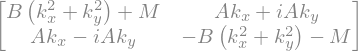

In [33]:
## Escribimos el Hamiltoniano
ham = """
   M * sigma_z + B * (k_x**2 + k_y**2) * sigma_z
   + A * k_x * sigma_x
   - A * k_y * sigma_y
"""
ham = kwant.continuum.sympify(ham)
## Lo mostramos en pantalla:
ham

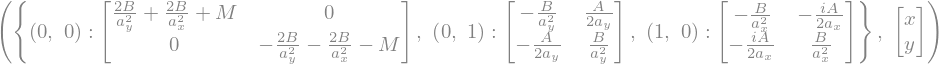

In [34]:
## Podemos obtener la discretización en formato simbólico:
model_symbolic = kwant.continuum.discretize_symbolic(ham)
model_symbolic = kwant.continuum.sympify(model_symbolic)
## También lo mostramos:
# (0,0) significa hoping de (i,j) -> (i+0, j+0) Es una onsite energy
# (0,1) es de (i,j) -> (i+0, j+1) Es el hopping en y
# (1,0) es de (i,j) -> (i+1, j+0) Es el hopping en x
model_symbolic

In [35]:
## Pasos desglosados para crear el sistema:
# >>> Rellenar en clase:

In [76]:
## Función para crear el sistema:

def make_nanoribbon(L, W, a):

    # 1) inicializamos un Builder y discretizamos el modelo
    # discretizamos en una red cuadrada de constante a
    model = kwant.continuum.discretize(ham, grid=a)

    # 2) rellenamos el sistema con sitios de la red

    def shape_nanoribbon(site):
        x, y, = site.pos
        return 0 <= x <= L and 0 <= y <= W

    syst = kwant.Builder()

    ## El comando fill es el que emplearemos en este caso. (0,0) es el sitio por el que se empezará a rellenar el sistema
    syst.fill(model, shape_nanoribbon, (0, 0))

    # 3) Creamos el lead de contacto:
    # En este caso añadimos la simetría traslacional en -x

    lead = kwant.Builder(kwant.TranslationalSymmetry([-a, 0]), )

    def shape_lead(site):
        x, y = site.pos
        return 0 <= y <= W

    lead.fill(model, shape_lead, (0, 0))
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    ## Como output sacamos el sistema finalizado y el lead izquierdo
    return syst.finalized(),  lead.finalized()



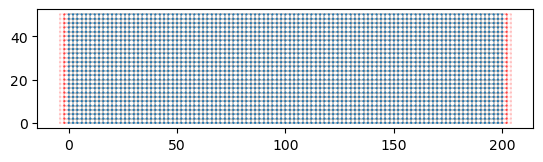

In [77]:
## Creamos una nanocinta de ejemplo
syst, lead = make_nanoribbon(L=200, W=50, a = 2)
kwant.plot(syst)
params = dict(A = 1, B = -2,  M = 1)

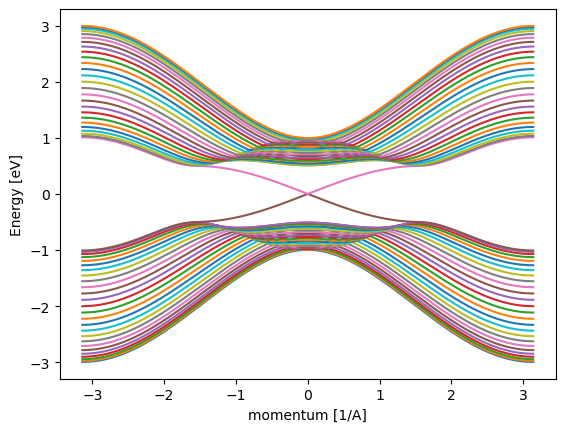

In [79]:
## Veamos alguna propiedad de los leads:
## Primero de forma sencilla mirando las bandas.
kwant.plotter.bands(lead, params=params, momenta=np.linspace(-np.pi, np.pi, 201), show=False)
plt.xlabel('momentum [1/A]')
plt.ylabel('Energy [eV]')
plt.show()

**Comentario**: Esta es una forma rápida pero no muy preferible de sacar las relaciones de dispersión. Es mejor sacar el Hamiltoniano del lead y diagonalizarlo con numpy/scipy. Véase por ejemplo 

In [72]:
# semiinf_QAH = kwant.wraparound.wraparound(lead, coordinate_names = 'x').finalized()
# kwant.plot(semiinf_QAH);
kwant.plot(lead)

TypeError: Unrecognized system type.

In [ ]:
Resumen (30 mins)
Aproximación kp y modelos continuos, topología (QAH, QSH), correspondencia del bulk/superficie.
Introducción de impurezas y desorden.
Extensión de los métodos a materiales superconductores.
